In [2]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def load_surf_swarm(fdir,step,KL):
    fname = fdir+"surfaceSwarm"+str(step).zfill(4)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]*KL
    ycoord = fdata[:,1]*KL
    return xcoord,ycoord

def load_depth(fdir,maxstep,dstep,KL):
    depth_l = []
    depth_r = []
    for step in range(dstep,maxstep+1,dstep):
        xcoord,ycoord = load_surf_swarm(fdir,step,KL)
        depth_l.append(ycoord[0])   
        depth_r.append(ycoord[-1])  
    return np.array(depth_l),np.array(depth_r)

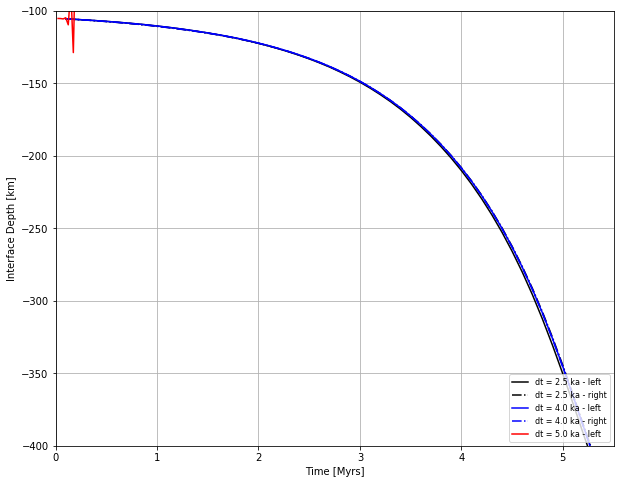

In [4]:
dt0,maxsteps0,dstep0,= 2.5,2201,40
dt1,maxsteps1,dstep1,= 4.0,1376,25
dt2,maxsteps2,dstep2,= 5.0,50,5


def times(dt,maxsteps,dstep):
    times = np.arange(dt*dstep,dt*maxsteps+dt*dstep/2,dt*dstep)
    return times
    
times0 = times(dt0,maxsteps0,dstep0)
times1 = times(dt1,maxsteps1,dstep1)
times2 = times(dt2,maxsteps2,dstep2)

KL = 500
fdir0 = "Kaus2010RTI_FreeSurface_2.5ka/"
fdir1 = "Kaus2010RTI_FreeSurface_4.0ka/"
fdir2 = "Kaus2010RTI_FreeSurface_5.0ka/"


depth0_l,depth0_r = load_depth(fdir0,maxsteps0,dstep0,KL)
depth1_l,depth1_r = load_depth(fdir1,maxsteps1,dstep1,KL)
depth2_l,depth2_r = load_depth(fdir2,maxsteps2,dstep2,KL)

fname = "Depth of the interface at x=−250km and x=250km versus time for the free surface simulations"
#fnameax1 = "Comparison of the evolution of rms velocity"
#fnameax2 = "Depth of the interface at x=−250km and x=250km versus time for the free surface simulations"

fig, ax1 = plt.subplots(nrows=1, figsize=(10,8))

ax1.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)

ax1.plot(times0/1000,depth0_l,'-k',label= "dt = 2.5 ka - left")
ax1.plot(times0/1000,depth0_r,'-.k',label= "dt = 2.5 ka - right")

ax1.plot(times1/1000,depth1_l,'-b',label= "dt = 4.0 ka - left")
ax1.plot(times1/1000,depth1_r,'-.b',label= "dt = 4.0 ka - right")

ax1.plot(times2/1000,depth2_l,'-r',label= "dt = 5.0 ka - left")
#ax1.plot(times2/1000,depth2_r,'-.r',label= "5.0 ma - right")

ax1.set_ylim([-400,-100])
ax1.set_xlim([0,5.5])
ax1.grid()
ax1.legend(loc = 'lower right',prop = {'size':8})

plt.savefig(fname,dpi=150,bbox_inches='tight')

In [6]:
from PIL import Image, ImageFont, ImageDraw
import imageio 


# fdir0 = "Kaus2010_RTI_FreeSlip_5ka/"
# fdir1 = "Kaus2010_RTIwithFSSA_theta1.0_5ka/"
# fdir2 = "Kaus2010_RTInoFSSA_5ka/"

fpath = "Kaus2010RTI_FreeSurface_2.5ka/"
dt = 2.5
dstep = 40
maxstep = 2201


images = [] 

for step in range(dstep,maxstep+1,dstep): 
    f_name = fpath +"image"+str(step).zfill(4)
    img = Image.open(f_name+".png")
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype('../../news serif bolditalic.ttf', 20)
    text = "T = " + "%.3f" %(step*dt/1000) + " Ma"
    draw.text((150,400),text,(0,0,0),font=font)
    f_name_texted = f_name+"_texted"
    img.save(f_name_texted +'.png')
    images.append(imageio.imread(f_name_texted+'.png')) 
imageio.mimsave(fpath+'imagegif.gif', images, duration=.2)     

images = [] 
for step in range(dstep,maxstep+1,dstep): 
    f_name = fpath +"mesh"+str(step).zfill(4)
    img = Image.open(f_name+".png")
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype('../../news serif bolditalic.ttf', 20)
    text = "T = " + "%.3f" %(step*dt/1000) + " Ma"
    draw.text((150,400),text,(0,0,0),font=font)
    f_name_texted = f_name+"_texted"
    img.save(f_name_texted +'.png')
    images.append(imageio.imread(f_name_texted+'.png')) 
imageio.mimsave(fpath+'meshgif.gif', images, duration=.2)     